# Entrega 1 - Predictor de muerte de pacientes con HIV

### Grupo 26:
     - Agustín Martínez  C.I 5.074.743-0
     - Joaquín Mezquita  C.I 5.239.865-9
     - Nicolás Núñez     C.I 5.127.722-0
     



## 1. Objetivo

El objetivo de esta tarea es construir un algortimo capaz de predecir la muerte de pacientes bajo observación por HIV utilizando árboles de decisión generados con el algoritmo ID3 visto en el curso. Para ello, utilizaremos el dataset `AIDS Clinical Trials Group Study 175` tomando como valor a predecir el indicador de censura 'cid'. 

El indicador de censura puede tomar dos valores "censoring" o "failure". La censura ocurre cuando un valor de una observación solo se conoce parcialmente. 

En este caso ocurre cuando el experimento termina en un momento determinado, tras el cuál los pacientes todavía vivos quedan todos censurados por la derecha.  

Luego del momento de la última observación no se conocen datos sobre la muerte o supervivencia de los pacientes. Por lo que se puede tomar únicamente el caso "failure" como la muerte de un paciente.d


El éxito del aprendizaje se medirá a traves de las métricas accuracy, precisión, recall y f1, dandole más importancia a la primera y última (podemos tirar algo mas de texto aca)


In [5]:
import funciones
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Objetivo a predecir
OBJETIVO = 'cid'

dataset = pd.read_csv('data.csv')

# Linea base y linea máxima

Podemos trazar como linea base de nuestro predictor un modelo sencillo el cual siempre predice que el resultado será la clase más probable, y como linea máxima, la implementación de random forest utilizada más adelante.

In [6]:
dataset.cid.value_counts()

cid
0    1618
1     521
Name: count, dtype: int64

Vemos que el dataset cuenta con 1618 entradas cuyo resultado es 0 (lo que implica que el paciente no murió durante la observación), y 521 cuyo resultado es 1. 
Tomando esto en cuenta, el predictor simple mencionado anteriormente devolverá que resultado es siempre 0.
A continuación se muestran los resultados de un modelo con esta característica.

In [7]:
Y_predicho = [0] * len(dataset)
Y_real = dataset[OBJETIVO]

accuracy, precision, recall, f1 = funciones.get_accuracy_precision_recall_f1(Y_real, Y_predicho, objetivo=0)

print('Accuracy de linea base:', accuracy)
print('Precision de linea base:', precision)
print('Recall de linea base:', recall)
print('F1 de linea base:', f1)

Accuracy de linea base: 0.7564282374941561
Precision de linea base: 0.7564282374941561
Recall de linea base: 1.0
F1 de linea base: 0.8613255256853872


Como era de esperar, el accuracy y precisión son equivalentes a la proporción de entradas cuyo resultado es 0 en el dataset.

Por otro lado, y adelantandonos ligeramente sobre los resultados, podemos calcular las mismas métricas sobre la implementación de random forest de la librería scikit-learn, sobre la que entraremos en detalle más adelante.

In [10]:
X_librerias = dataset.copy().drop(columns=[OBJETIVO])
Y_librerias = dataset[OBJETIVO].copy()

X_train_librerias, X_test_librerias, Y_train_librerias, Y_test_librerias = train_test_split(X_librerias, Y_librerias, test_size = 0.3, random_state = 12345, stratify=Y_librerias)

RandomForest = RandomForestClassifier(criterion='entropy', random_state=12345)
RandomForest.fit(X_train_librerias, Y_train_librerias)
Y_predicho_random_forest = RandomForest.predict(X_test_librerias)

accuracy, precision, recall, f1 = funciones.get_accuracy_precision_recall_f1(Y_test_librerias, Y_predicho_random_forest, objetivo=0)

print('Accuracy de linea máxima:', accuracy)
print('Precision de linea máxima:', precision)
print('Recall de linea máxima:', recall)
print('F1 de linea máxima:', f1)

Accuracy de linea máxima: 0.8925233644859814
Precision de linea máxima: 0.9048543689320389
Recall de linea máxima: 0.9588477366255144
F1 de linea máxima: 0.9310689310689311


Con estas métricas, se espera que el predictor implementado obtenga resultados intermedios entre ambas lineas trazadas.

## 2. Diseño del predictor

# Preprocesamiento

## Discretización del dataset

Antes de entrenar el árbol, se discretizan las variables que tomen valores numéricos continuos, o valores discretos dentro de un intervalo amplio. Es decir, para cada atributo a discretizar, se generan rangos, y cada valor es reemplazado por el índice del rango en el que se encuentra, reduciendo así la cantidad de valores distintos que puede tomar cada atributo.

Para esto, se buscan los mejores puntos de corte que maximicen la ganancia de información. Primero, se calculan todos los posibles puntos de corte para un atributo y se evalúa cual es su ganancia. Luego, se seleccionan los puntos que generan la mejor ganancia de información, respetando el valor de max_range_split. Finalmente, los valores originales del atributo se reemplazan por el índice del rango al que pertenecen, simplificando así el modelo.

Tomando en cuenta las observaciones hechas a las columnas y los valores del dataset, los atributos a discretizar son: 

- pidnum
- time
- age
- wtkg
- karnof
- preanti
- cd40
- cd420
- cd80
- cd820

## Entrenamiento del predictor

Para evaluar la precisión del dataset, este es separado en 3 conjuntos (hay que usar evaluacion y ver bien que porcentajes usar)

- Entrenamiento / 80%
- Validación / 10%
- Evaluación / 10%



## Por ejemplo, para un clasificador:
    

## 2.1 Preprocesamiento de datos

Dado que el conjunto de datos no contiene campos con
- Decisiones sobre tratamiento de datos numéricos, faltantes, etc. antes de la aplicación de el algoritmo
- Selección/generación de atributos


## 2.2 Algoritmo
Extensiones del algoritmo original necesarias para la resolución del problema: tratamiento de atributos faltantes, numéricos, etc. (si es el propio algoritmo el que lo maneja), implementaciones adicionales necesarias para manejar ensambles de clasificadores, etc.


## 2.3 Evaluación
- Qué conjunto de métricas se utilizan para la evaluación de la solución y su definición
- Sobre qué conjunto(s) se realiza el entrenamiento, ajuste de la solución, evaluación, etc. Explicar cómo se construyen estos conjuntos.

## 3. Experimentación

- Presentar los distintos experimentos que se realizan y los resultados que se obtienen.

- La información de los resultados se presenta en tablas y en gráficos, de acuerdo a su naturaleza. Por ejemplo:

_En la gráfica 1, se observa el error cuadrático total del conjunto de entrenamiento a medida que pasan los juegos para el oponente X_

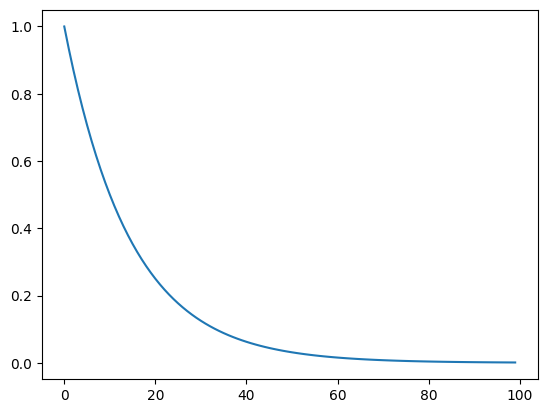

In [11]:
import matplotlib.pyplot
matplotlib.pyplot.plot(range(0,100), [2**-(x/10) for x in range(0,100)])


- Debe existir alguna instancia donde se compile la información relevante de los experimentos de forma de poder comparar fácilmente los distintos experimentos. Por ejemplo:

_En la tabla 1, se presentan los distintos resultados contra el jugador aleatorio, para los distintos valores de $\alpha$ elegidos. El mejor resultado se obtiene para $\alpha=0.05$, lo que prueba que la estrategia..._

<table>
  <tr>
    <th>$\alpha$</th>
    <th>...</th>
    <th>Turnos</th>
    <th>Error</th>
  </tr>
  <tr>
    <td>0.001</td>
    <td>...</td>
    <td>100</td>
    <td>0.991</td>
  </tr>    
  <tr>
    <td>0.005</td>
    <td>...</td>
    <td>100</td>
    <td>0.987</td>
  </tr>
  <tr style="font-weight:bold">
    <td>0.05</td>
    <td>...</td>
    <td>100</td>
    <td>0.329</td>
  </tr>
  <tr>
    <td>0.5</td>
    <td>...</td>
    <td>100</td>
    <td>0.564</td>
  </tr>    
    <caption>Tabla 1 - Entrenamiento del jugador X para distintos valores de $\alpha$</caption>
</table>


# Aca podemos tirar sobre el intervalo de confianza del predictor 

## 4. Comparación

En esta sección se comparara nuetro algoritmo de ID3 contra los algoritmos de la libreria scikit-learn:
- DecisionTreeClassifier
- RandomForestClassifier

En principio, nuestro algoritmo muestra peores resultados que los ya implementados

## 5. Conclusión

Una breve conclusión del trabajo realizado. Por ejemplo: 
- ¿cuándo se dieron los mejores resultados del jugador?
- ¿encuentra alguna relación con los parámetros / oponentes/ atributos elegidos?
- ¿cómo mejoraría los resultados?